# Exploring Musical Preference with Spotify User Streaming Data

The goal of this analysis is to gain insight into the musical attributes of Spotify user streaming data. This analysis is on music alone, excluding podcasts, talk shows, et cetera.

The data was downloaded from [Spotify](https://www.spotify.com/) and combined with "audio feature" data extracted via the Spotify API. [Audio features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) are metrics that characterize a tracks danceability, energy, valence, and more.  This article from [Towards Data Science](https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3) describes the method.




### Summary of Results

Streaming time over months appears to be somewhat cyclical, with periods of high and low streaming. The top tracks consist of Hip Hop/Rap and EDM, but also include Lo-fi of different flavors.

Analysis of the primary audio features, for all tracks:
- Danceability: Tracks are suitable for dancing.
- Energy: Tracks are medium energy. 
- Valence: Tracks have somewhat negative tone.
 
The primary audio features, for the top 100 tracks, showed:
- Distributions:
- Means as compared to all tracks:

For more details, please refer to the the full analysis below.



## Initial Data Exploration and Cleaning

In [1]:
# Read in the data
import pandas as pd, numpy as np
df = pd.read_csv('output/final.csv', index_col = 0)

# Quick exploration of the data
print(df.shape)
df_original_size =  df.shape[0] # size original size of df for calculating % data removed later
pd.options.display.max_columns = 30 # to avoid truncated output 
print(df.dtypes.unique())
df

(13023, 26)
[dtype('O') dtype('int64') dtype('float64')]


,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,Inner Link___Raimu,2021-06-11 13:25,Raimu,Inner Link,128571,2021-06-11 13:25:00,0.645,0.372,11,-10.159,0,0.0512,0.485,0.859,0.1340,0.2370,83.973,audio_features,6t3kLoK5kPj65Yn7VmE4fK,spotify:track:6t3kLoK5kPj65Yn7VmE4fK,https://api.spotify.com/v1/tracks/6t3kLoK5kPj6...,https://api.spotify.com/v1/audio-analysis/6t3k...,128571,4,Inner Link,14o2EETBZOUz43oD4zUDll
1,夢___VΛN,2021-06-11 13:27,VΛN,夢,112941,2021-06-11 13:27:00,0.552,0.608,1,-9.786,0,0.0345,0.352,0.000,0.0533,0.6370,112.367,audio_features,4s6LhHAV5SEsOV0lC2tjvJ,spotify:track:4s6LhHAV5SEsOV0lC2tjvJ,https://api.spotify.com/v1/tracks/4s6LhHAV5SEs...,https://api.spotify.com/v1/audio-analysis/4s6L...,162373,4,If You Can Believe Your Eyes & Ears,76oMr4Y2pOtcrvZLc2ZikF
2,Take You There___Huey Daze,2021-06-11 13:30,Huey Daze,Take You There,152024,2021-06-11 13:30:00,0.594,0.402,8,-9.562,0,0.0299,0.590,0.846,0.3490,0.3640,82.110,audio_features,7pn7E6FglPjV1dDaknCaD8,spotify:track:7pn7E6FglPjV1dDaknCaD8,https://api.spotify.com/v1/tracks/7pn7E6FglPjV...,https://api.spotify.com/v1/audio-analysis/7pn7...,152025,4,Setsuna,7MFvFVNg8VQAar6XjEUj8R
3,nindo___aekasora,2021-06-11 13:32,aekasora,nindo,131500,2021-06-11 13:32:00,0.609,0.347,6,-14.469,0,0.1970,0.802,0.847,0.4400,0.7180,83.863,audio_features,17rN5IMi9Z7yBUdh6hd6Al,spotify:track:17rN5IMi9Z7yBUdh6hd6Al,https://api.spotify.com/v1/tracks/17rN5IMi9Z7y...,https://api.spotify.com/v1/audio-analysis/17rN...,131500,4,Simple Things,0Lx7VVGGBhXVI0TJ3yCLyz
4,Blue Dragon___DaniSogen,2021-06-11 13:35,DaniSogen,Blue Dragon,199384,2021-06-11 13:35:00,0.241,0.394,1,-9.094,0,0.0368,0.832,0.455,0.1810,0.0645,86.785,audio_features,4eJ11PArOQBen4ZYQu7byX,spotify:track:4eJ11PArOQBen4ZYQu7byX,https://api.spotify.com/v1/tracks/4eJ11PArOQBe...,https://api.spotify.com/v1/audio-analysis/4eJ1...,199385,5,Hanagasumi,56q8Tkk5130VkPysfMN8j8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13018,A Trip for You___Roboflex,2022-06-09 20:23,Roboflex,A Trip for You,113809,2022-06-09 20:23:00,0.517,0.566,9,-9.490,0,0.0817,0.878,0.915,0.1660,0.3300,77.536,audio_features,67ZzZ5axS4vv3HKb4052Ju,spotify:track:67ZzZ5axS4vv3HKb4052Ju,https://api.spotify.com/v1/tracks/67ZzZ5axS4vv...,https://api.spotify.com/v1/audio-analysis/67Zz...,134143,4,A Trip for You,0QKQialdrr80S3EMFupxHR
13019,iykyk___meadowzz,2022-06-09 20:25,meadowzz,iykyk,115709,2022-06-09 20:25:00,0.682,0.396,5,-10.108,0,0.0440,0.414,0.771,0.6200,0.2360,141.971,audio_features,1ljFw0Kwk2iYoQUeg5RAp1,spotify:track:1ljFw0Kwk2iYoQUeg5RAp1,https://api.spotify.com/v1/tracks/1ljFw0Kwk2iY...,https://api.spotify.com/v1/audio-analysis/1ljF...,126761,4,gliding on vibes,0FsO0vZwBtOVav3LTmG274
13020,Retrospective___Zach Jordan,2022-06-09 20:27,Zach Jordan,Retrospective,112443,2022-06-09 20:27:00,0.709,0.325,8,-11.215,1,0.0725,0.047,0.949,0.1150,0.7080,77.983,audio_features,5BYOPUidJX9Hx0T6tv3lWA,spotify:track:5BYOPUidJX9Hx0T6tv3lWA,https://api.spotify.com/v1/tracks/5BYOPUidJX9H...,https://api.spotify.com/v1/audio-analysis/5BYO...,131154,4,Retrospective,1hdYL4Gu453c6Ve4lGsUH1
13021,I got to love you___Yankee Hart,2022-06-09 20:29,Yankee Hart,I got to love you,126534,2022-06-09 20:29:00,0.567,0.366,5,-17.642,1,0.0603,0.960,0.952,0.4790,0.6250,76.876,audio_features,5XW0aneQhkAE93vrxvTDHx,spotify:track:5XW0aneQhkAE93vrxvTDHx,https://api.spotify.com/v1/tracks/5XW0aneQhkAE...,https://api.spotify.com/v1/audio-analysis/5XW0...,132812,4,I got to love you,2AZB7Ph3AycHxjYKB2jfwn


There are 13023 rows (streams), with 26 columns in the dataset.

The first entry is dated 6/11/21; the last entry 6/9/22. There is about one year of data. 

Some columns could be dropped such as *name* (which includes both the track name and the artist name, and *endTime* (which appears to be the same *datetime*) There are others columns such as *type, id, uri, track_href, analysis_url, and albumId* will likely not be usfeful to our analysis.

In [2]:
# Take a closer look at columns with the object data type
df.select_dtypes(object).head()

,name,endTime,artistName,trackName,datetime,type,id,uri,track_href,analysis_url,albumName,albumID
0,Inner Link___Raimu,2021-06-11 13:25,Raimu,Inner Link,2021-06-11 13:25:00,audio_features,6t3kLoK5kPj65Yn7VmE4fK,spotify:track:6t3kLoK5kPj65Yn7VmE4fK,https://api.spotify.com/v1/tracks/6t3kLoK5kPj6...,https://api.spotify.com/v1/audio-analysis/6t3k...,Inner Link,14o2EETBZOUz43oD4zUDll
1,夢___VΛN,2021-06-11 13:27,VΛN,夢,2021-06-11 13:27:00,audio_features,4s6LhHAV5SEsOV0lC2tjvJ,spotify:track:4s6LhHAV5SEsOV0lC2tjvJ,https://api.spotify.com/v1/tracks/4s6LhHAV5SEs...,https://api.spotify.com/v1/audio-analysis/4s6L...,If You Can Believe Your Eyes & Ears,76oMr4Y2pOtcrvZLc2ZikF
2,Take You There___Huey Daze,2021-06-11 13:30,Huey Daze,Take You There,2021-06-11 13:30:00,audio_features,7pn7E6FglPjV1dDaknCaD8,spotify:track:7pn7E6FglPjV1dDaknCaD8,https://api.spotify.com/v1/tracks/7pn7E6FglPjV...,https://api.spotify.com/v1/audio-analysis/7pn7...,Setsuna,7MFvFVNg8VQAar6XjEUj8R
3,nindo___aekasora,2021-06-11 13:32,aekasora,nindo,2021-06-11 13:32:00,audio_features,17rN5IMi9Z7yBUdh6hd6Al,spotify:track:17rN5IMi9Z7yBUdh6hd6Al,https://api.spotify.com/v1/tracks/17rN5IMi9Z7y...,https://api.spotify.com/v1/audio-analysis/17rN...,Simple Things,0Lx7VVGGBhXVI0TJ3yCLyz
4,Blue Dragon___DaniSogen,2021-06-11 13:35,DaniSogen,Blue Dragon,2021-06-11 13:35:00,audio_features,4eJ11PArOQBen4ZYQu7byX,spotify:track:4eJ11PArOQBen4ZYQu7byX,https://api.spotify.com/v1/tracks/4eJ11PArOQBe...,https://api.spotify.com/v1/audio-analysis/4eJ1...,Hanagasumi,56q8Tkk5130VkPysfMN8j8


There are columns here that will not be useful to the analysis, we will drop them:

In [3]:
# drop object columns that are not needed
columns_to_drop = ['name', 'endTime', 'type', 'id', 'uri', 'track_href', 'analysis_url','albumID']
df.drop(columns = columns_to_drop, inplace = True)

In [4]:
# Take a closer look at columns with the number data type
df.select_dtypes("number")

,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,128571,0.645,0.372,11,-10.159,0,0.0512,0.485,0.859,0.1340,0.2370,83.973,128571,4
1,112941,0.552,0.608,1,-9.786,0,0.0345,0.352,0.000,0.0533,0.6370,112.367,162373,4
2,152024,0.594,0.402,8,-9.562,0,0.0299,0.590,0.846,0.3490,0.3640,82.110,152025,4
3,131500,0.609,0.347,6,-14.469,0,0.1970,0.802,0.847,0.4400,0.7180,83.863,131500,4
4,199384,0.241,0.394,1,-9.094,0,0.0368,0.832,0.455,0.1810,0.0645,86.785,199385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13018,113809,0.517,0.566,9,-9.490,0,0.0817,0.878,0.915,0.1660,0.3300,77.536,134143,4
13019,115709,0.682,0.396,5,-10.108,0,0.0440,0.414,0.771,0.6200,0.2360,141.971,126761,4
13020,112443,0.709,0.325,8,-11.215,1,0.0725,0.047,0.949,0.1150,0.7080,77.983,131154,4
13021,126534,0.567,0.366,5,-17.642,1,0.0603,0.960,0.952,0.4790,0.6250,76.876,132812,4


These columns contain the amount of time a track was played, a tracks duration, and the audio feature information. Most of this information will be key to our analysis.

The time played and duration of a track is measured in milliseconds, which is not very intuitve. We will convert these values to seconds and drop the old columns:

In [5]:
# Transforming the unit of time measurement from milliseconds to seconds
df['secPlayed'] = df['msPlayed'] / 1000
# df = df[df.columns[:-1].insert(4, df.columns[-1])] #moving seconds column to proper place
df['track_length_sec'] = df['duration_ms'] / 1000
# df = df[df.columns[:-1].insert(5, df.columns[-1])] #moving seconds column to proper place
df.drop(columns= ['msPlayed', 'duration_ms'], inplace= True)

Finally, the datetime column contains values which are of the object data type. We will convert these to the python "datetime" datatype, for ease of use:

In [6]:
# Convert dates into datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

Now let's take a look summary info about the data:

In [7]:
# View a concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13023 entries, 0 to 13022
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   artistName        13023 non-null  object        
 1   trackName         13023 non-null  object        
 2   datetime          13023 non-null  datetime64[ns]
 3   danceability      13023 non-null  float64       
 4   energy            13023 non-null  float64       
 5   key               13023 non-null  int64         
 6   loudness          13023 non-null  float64       
 7   mode              13023 non-null  int64         
 8   speechiness       13023 non-null  float64       
 9   acousticness      13023 non-null  float64       
 10  instrumentalness  13023 non-null  float64       
 11  liveness          13023 non-null  float64       
 12  valence           13023 non-null  float64       
 13  tempo             13023 non-null  float64       
 14  time_signature    1302

We have 3 object columns (artistName, trackName, albumName), 14 numerical columns, and our dates. There are no null values.

Now we begin a deeper exploration of the data.

### Numerical Data Analysis
 The goal of this analysis is to gain an understanding of the characteristics of each attribute in the dataset.

 Let's begin with our numerical attributes:

In [8]:
# Generate descriptive statistics for numerical variables
df.describe(include = 'number')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,secPlayed,track_length_sec
count,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000,13023.000000
mean,0.660204,0.471576,5.355064,-10.659885,0.505260,0.135408,0.420389,0.498471,0.167643,0.407769,115.798729,3.929740,137.760811,175.056266
std,0.154914,0.219224,3.625180,5.202593,0.499992,0.129536,0.338017,0.417312,0.128011,0.232181,34.299913,0.412401,83.887747,69.555021
min,0.000000,0.000020,0.000000,-38.939000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.640000
25%,0.576000,0.303000,2.000000,-13.208000,0.000000,0.043800,0.087100,0.000001,0.100000,0.218000,84.954500,4.000000,100.710500,132.000000
50%,0.685000,0.464000,6.000000,-9.692000,1.000000,0.072000,0.377000,0.744000,0.116000,0.385000,111.017000,4.000000,129.580000,161.053000
75%,0.770000,0.637000,9.000000,-6.873500,1.000000,0.195000,0.748000,0.890000,0.176000,0.576000,144.006000,4.000000,175.333000,202.992000
max,0.980000,0.999000,11.000000,-1.083000,1.000000,0.950000,0.996000,1.000000,0.973000,0.972000,236.196000,5.000000,4841.615000,3600.000000


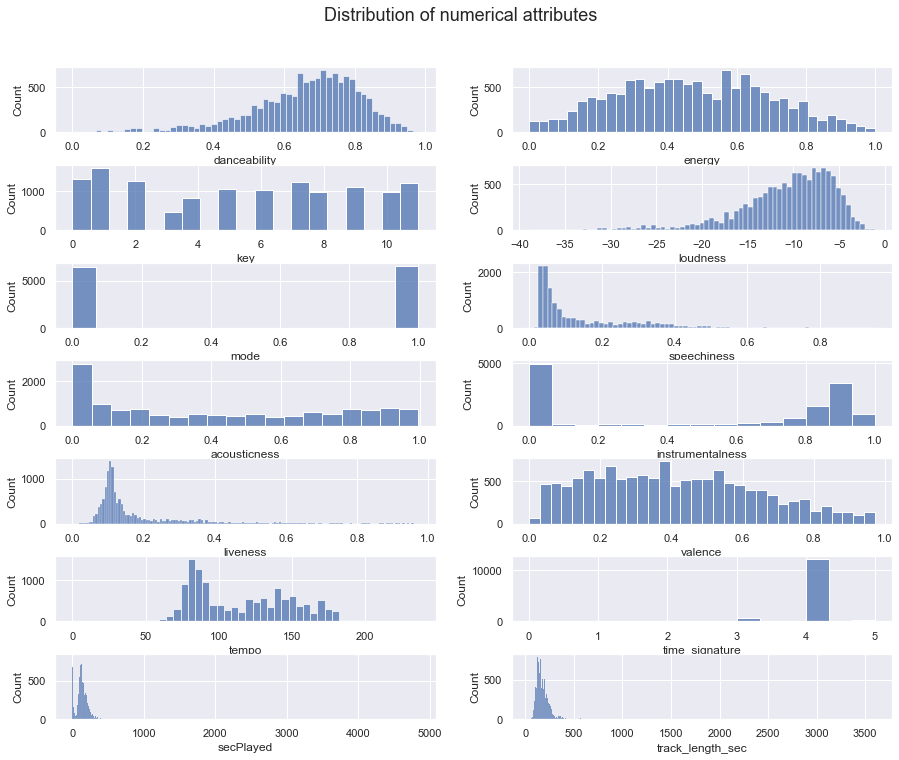

In [9]:
# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Generate list of numerical attributes
df_numerical = df.select_dtypes(include='number').columns

# Plot histograms of numerical attributes
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of numerical attributes", fontsize=18, y=0.95)

# Loop through the length of attributes and keep track of index
for n, col in enumerate(df_numerical):
    # Add a new subplot iteratively
    ax = plt.subplot(7, 2, n + 1)

    # Filter df and plot attribute on the new subplot axis
    sns.histplot(df, x= col, ax = ax)



Generating descriptive statistics and a histogram for each numerical attribute allows us to gain a better understanding of the data and make decisions about what attributes we want to examine further. Some attributes display characteristics that require more investigation which we will perform below:

#### Seconds Played & Track Length
- secPlayed is how long a track was played during that instance of streaming.
- track_length_sec is the total duration of a track

This means that tracks that were played for less than the total track duration are tracks that were *skipped*, while tracks that were played for more than the total track duration are tracks that we *replayed*. 

We will create a new column "percent_played" and visualze these two categories of data:

In [10]:
# Generate new percent played column
df["percent_played"] = (df['secPlayed'] / df['track_length_sec']) * 100
# df = df[df.columns[:-1].insert(5, df.columns[-1])] #moving seconds column to proper place

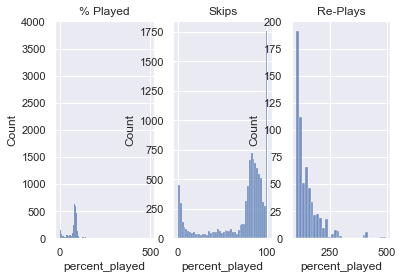

In [11]:
fig, axes = plt.subplots(1, 3)
sns.histplot(df.percent_played, ax = axes[0])
axes[0].set_title('% Played')

sns.histplot(df.percent_played[df.percent_played < 100], ax = axes[1])
axes[1].set_title('Skips')

sns.histplot(df.percent_played[df.percent_played > 100], ax = axes[2])
axes[2].set_title('Re-Plays')

plt.show()

The goal of this analysis is to understand musical preference, as such we will apply a few filters to the data.

First we will remove the near immediate skips and tracks with durations longer than 10 minutes:

In [12]:
df = df[df.secPlayed > 30] #removing tracks that were played for less than 30 secs
df = df[df.track_length_sec < 600] #removing tracks are longer than 10 minutes (likely not songs)


Now, let's take a look at the descriptive statistics for the percent played column:

In [13]:
df.percent_played.describe()

count    11797.000000
mean        88.785300
std         25.438619
min          7.809925
25%         81.031633
50%         90.327254
75%         99.999576
max        494.129678
Name: percent_played, dtype: float64

We will remove tracks played for less than 60% (approx mean - std) and tracks played more than 200% (more than 1 full replay).

In [14]:
# Apply filters to data
df = df[df['percent_played'] >= 70] # remove tracks in which less than 70% of the track was played
df = df[df['percent_played'] <= 200] # remove tracks in which less than 70% of the track was played
print(df.shape)
print((df_original_size - df.shape[0])/df_original_size * 100, "percent of the data has been removed.")


(10359, 19)
20.456116102280582 percent of the data has been removed.


Let's take a look at our new distributions:

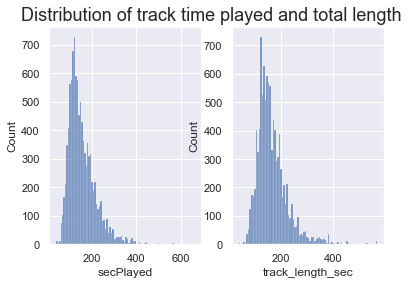

In [15]:
plt.figure()
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of track time played and total length", fontsize=18, y=0.95)

ax = plt.subplot(1,2,1)
sns.histplot(df, x= 'secPlayed', ax = ax)

ax = plt.subplot(1,2,2)
sns.histplot(df, x= 'track_length_sec', ax = ax)
plt.show()



#### Key & Mode

We will transfrom the numerical columns describing key and mode to catergorical variables:

In [16]:
# Substitute each numerical value in key column with a string descrbing the pitch.
df['key'] = df['key'].map(
    {0: 'C', 1: 'C_s/D_f', 2: 'D', 3: 'D_s/E_f', 4: 'E', 5: 'F', 6: 'F_s/G_f', 7: 'G', 8: 'G_s/A_f', 9: 'A', 10: 'A_s/B_f', 11: 'B' })
    
# Mode: O is Minor, 1 is Major. 
df['mode'] = df['mode'].map({0: 'Minor', 1: 'Major'})

#### Loudness

In [17]:
df.loudness.describe()

count    10359.000000
mean       -11.276891
std          5.097193
min        -35.874000
25%        -13.849000
50%        -10.419000
75%         -7.600000
max         -1.083000
Name: loudness, dtype: float64

In [18]:
df[df['loudness'] < -35]

,artistName,trackName,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,albumName,secPlayed,track_length_sec,percent_played
11680,Take/Five,Interstellar,2022-05-12 22:17:00,0.173,0.00885,D,-35.874,Major,0.0447,0.994,0.42,0.103,0.0525,67.656,4,Chasma,120.0,150.215,79.885497


#### Speechiness

Values greater than 0.66 are likely all speech. We want to remove these.

In [19]:
# Examine values above 0.66
(df[df.speechiness > 0.66]).sort_values('speechiness', ascending= False).head()

,artistName,trackName,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,albumName,secPlayed,track_length_sec,percent_played
8855,Kanye West,School Spirit Skit 1,2022-03-08 20:57:00,0.648,0.218,G_s/A_f,-15.108,Major,0.950,0.326,0.0000,0.352,0.642,164.250,5,The College Dropout,78.693,78.693,100.00000
8850,Kanye West,Workout Plan,2022-03-08 20:44:00,0.715,0.288,C_s/D_f,-13.843,Major,0.925,0.785,0.0000,0.688,0.772,115.114,4,The College Dropout,46.173,46.173,100.00000
9463,Kanye West,School Spirit Skit 2,2022-03-18 14:43:00,0.716,0.308,F,-12.629,Major,0.925,0.334,0.0000,0.215,0.830,128.412,3,The College Dropout,43.533,43.533,100.00000
8857,Kanye West,School Spirit Skit 2,2022-03-08 20:58:00,0.716,0.308,F,-12.629,Major,0.925,0.334,0.0000,0.215,0.830,128.412,3,The College Dropout,43.533,43.533,100.00000
11586,Reggie Lume,Gust Of Feels,2022-05-11 19:35:00,0.782,0.336,A,-17.410,Minor,0.814,0.978,0.0677,0.116,0.663,78.033,4,Gust Of Feels,70.801,80.000,88.50125


A few skits are here. We will remove them:

In [20]:
# Rmove tracks that are mostly speech
df = df[df['speechiness'] < 0.66] 

#### Instrumentalness

The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 



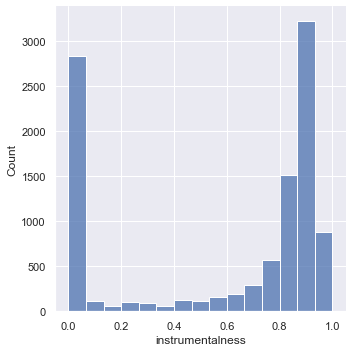

In [21]:
sns.displot(df.instrumentalness)
plt.show()

The distibution of the data is bimodal indicating that it both instrumentals and vocal tracks. 

#### Liveness

 A value above 0.8 provides strong likelihood that the track is live. Most of the distribution is far below this value.

#### Tempo

Some tracks have 0 tempo and will be removed from the analysis:

In [22]:
df = df[df['tempo'] != 0]

#### Time Signature

In [23]:
df.time_signature.value_counts()

4    9562
3     493
5     153
1     118
Name: time_signature, dtype: int64

#### Cleaning Up Numerical Variables

We will focus on the interesting audio features with derived values: energy, danceability, and valence.


In [24]:
# Drop columms we don't want
columns_to_drop = ["loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "time_signature", 'tempo']
df.drop(columns = columns_to_drop, inplace = True)
print((df_original_size - df.shape[0])/df_original_size * 100, "percent of the data has been removed.")


20.709513936880903 percent of the data has been removed.


In [25]:
df.head()

,artistName,trackName,datetime,danceability,energy,key,mode,valence,albumName,secPlayed,track_length_sec,percent_played
0,Raimu,Inner Link,2021-06-11 13:25:00,0.645,0.372,B,Minor,0.2370,Inner Link,128.571,128.571,100.000000
2,Huey Daze,Take You There,2021-06-11 13:30:00,0.594,0.402,G_s/A_f,Minor,0.3640,Setsuna,152.024,152.025,99.999342
3,aekasora,nindo,2021-06-11 13:32:00,0.609,0.347,F_s/G_f,Minor,0.7180,Simple Things,131.500,131.500,100.000000
4,DaniSogen,Blue Dragon,2021-06-11 13:35:00,0.241,0.394,C_s/D_f,Minor,0.0645,Hanagasumi,199.384,199.385,99.999498
5,Cotard Beatz,Lucid Mind,2021-06-11 13:38:00,0.342,0.264,G,Minor,0.1970,Lucid Mind,170.239,170.240,99.999413


### Categorical Data Analysis

We will take a quick look at a description of the object data types:

In [26]:
df.describe(include = object)

,artistName,trackName,key,mode,albumName
count,10326,10326,10326,10326,10326
unique,2128,3377,12,2,3036
top,Lil Durk,Petty Too (feat. Future),C_s/D_f,Minor,Certified Lover Boy
freq,76,22,1154,5292,43


Here we can see the number of unique artists, tracks, and albumns.  

Let's create a dataframe only containing unique tracks:

## Top 10 Artists, Tracks, and Albums

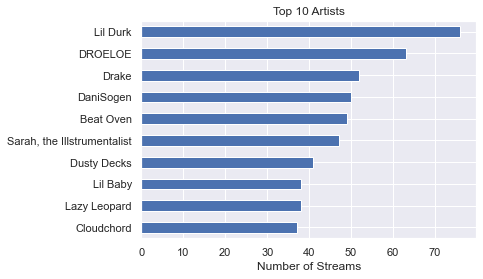

In [27]:
df['artistName'].value_counts().head(10).sort_values().plot(kind = 'barh') # Top artists
plt.title('Top 10 Artists')
plt.xlabel("Number of Streams")
plt.show()

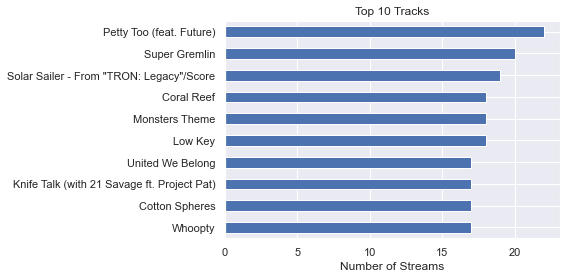

In [28]:
df['trackName'].value_counts().head(10).sort_values().plot(kind = 'barh') # Top tracks
plt.title('Top 10 Tracks')
plt.xlabel("Number of Streams")
plt.show()

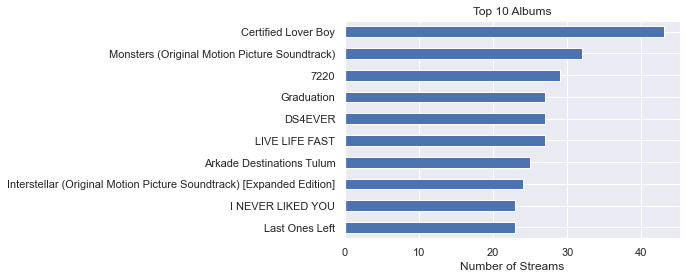

In [29]:
df['albumName'].value_counts().head(10).sort_values().plot(kind = 'barh') #Top albums
plt.title('Top 10 Albums')
plt.xlabel("Number of Streams")
plt.show()

## Quantitative Analysis of Track Features

In [30]:
df.head()

,artistName,trackName,datetime,danceability,energy,key,mode,valence,albumName,secPlayed,track_length_sec,percent_played
0,Raimu,Inner Link,2021-06-11 13:25:00,0.645,0.372,B,Minor,0.2370,Inner Link,128.571,128.571,100.000000
2,Huey Daze,Take You There,2021-06-11 13:30:00,0.594,0.402,G_s/A_f,Minor,0.3640,Setsuna,152.024,152.025,99.999342
3,aekasora,nindo,2021-06-11 13:32:00,0.609,0.347,F_s/G_f,Minor,0.7180,Simple Things,131.500,131.500,100.000000
4,DaniSogen,Blue Dragon,2021-06-11 13:35:00,0.241,0.394,C_s/D_f,Minor,0.0645,Hanagasumi,199.384,199.385,99.999498
5,Cotard Beatz,Lucid Mind,2021-06-11 13:38:00,0.342,0.264,G,Minor,0.1970,Lucid Mind,170.239,170.240,99.999413


In [31]:
unique_tracks = df.drop(columns= ['datetime', 'secPlayed', 'track_length_sec', 'percent_played']).drop_duplicates().copy()
unique_tracks.shape

(3454, 8)

In [32]:
unique_tracks.describe()

,danceability,energy,valence
count,3454.000000,3454.000000,3454.000000
mean,0.663177,0.446036,0.396361
std,0.143588,0.217659,0.232700
min,0.060400,0.001330,0.000010
25%,0.588000,0.279250,0.203000
50%,0.681000,0.425500,0.372000
75%,0.763000,0.612000,0.563750
max,0.980000,0.999000,0.972000


In [33]:
# # Group data by unique tracks, total the play time.
# grouped_by_tracks = df.groupby(df['trackName']).agg(
#     {'secPlayed' : 'sum', 'danceability' : 'mean', 'energy' : 'mean', 'valence' : 'mean',
#     "key": lambda x: pd.Series.unique(x)[0],
#     "mode": lambda x: pd.Series.unique(x)[0]}).reset_index().copy()
# grouped_by_tracks['total_minutesPlayed'] = grouped_by_tracks['secPlayed'] / 60 # Create new column with total minutes played
# grouped_by_tracks.drop(columns='secPlayed', inplace = True) # Drop seconds column


 Next we will visualize relationship of our features:

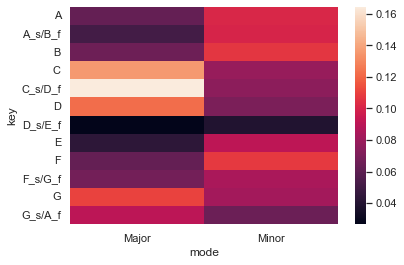

In [34]:
#Visualize relationship of key and mode with heatmap
streams_crosstab = pd.crosstab(index=unique_tracks['key'], columns=unique_tracks['mode'], normalize = 'columns') # Contingence table comparing key and mode
sns.heatmap(streams_crosstab) # Generate heatmap
plt.show()

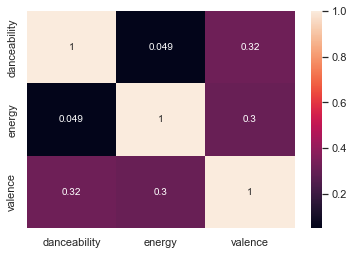

In [35]:
#Visualize relationship of numerical variables
corrleation = unique_tracks.select_dtypes('number').corr()
sns.heatmap(corrleation, annot= True)
plt.show()

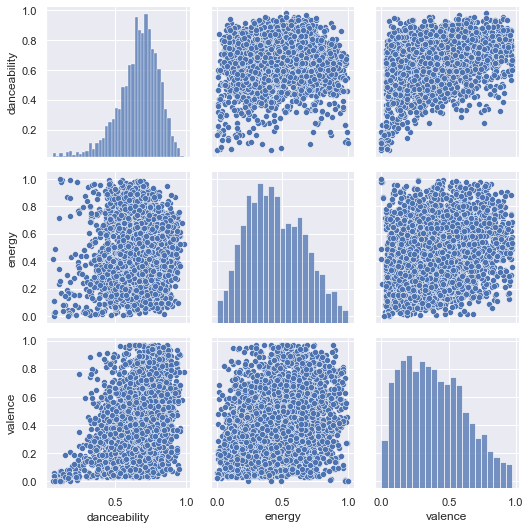

In [36]:
# View scatterplot and histogram of data on the same plot
g = sns.PairGrid(unique_tracks)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

### Top 100 Tracks

In [37]:
top_100_track_list = df['trackName'].value_counts().head(100).index
top_100_track_list

Index(['Petty Too (feat. Future)', 'Super Gremlin',
       'Solar Sailer - From "TRON: Legacy"/Score', 'Low Key', 'Monsters Theme',
       'Coral Reef', 'Whoopty', 'Cotton Spheres',
       'Knife Talk (with 21 Savage ft. Project Pat)', 'United We Belong',
       'We Contain Multitudes - from home', 'words > numbers',
       'Train From Paris', 'Alone in the World',
       'Too Hot (feat. Moneybagg Yo)', 'No Problem Too Small',
       'Emerald and Stone', 'Samurai', 'Gang Activity', 'Loungerie',
       'millions', 'Intro', 'Candles', 'Swing Set', 'One Too Many', 'Daisies',
       'Right On', 'Remembering', 'The World is Turning', 'I Be', 'La Luna',
       'special', 'Caminos', 'The Chillest', 'Arctic Future',
       'Ginger and Lime', 'Rain On Me', 'Computer Murderers', 'strolling',
       'Take Me Back', 'Warm Breeze', 'From the Ashes', 'Zim Zimma',
       'Blood All On it (feat. Key Glock, Young Dolph)', 'Golden Cat',
       'Champagne Poetry', 'S.T.A.Y.', 'Foemeo', 'Big Easy City', '

In [80]:
# Create new dataframe with top 100 for later
# top_100_tracks = grouped_by_tracks.sort_values(by = 'total_minutesPlayed', ascending = False)[0:100]
top_100_tracks = unique_tracks[unique_tracks['trackName'].isin(top_100_track_list)].copy()
# top_100_tracks.head(10)

In [39]:
top_100_tracks.describe()

,danceability,energy,valence
count,106.000000,106.000000,106.000000
mean,0.644541,0.418216,0.377745
std,0.201859,0.223618,0.233881
min,0.079300,0.007130,0.006720
25%,0.537250,0.239500,0.168250
50%,0.711000,0.422500,0.373500
75%,0.800500,0.579250,0.547750
max,0.925000,0.976000,0.957000


Anomolous tracks in the data...

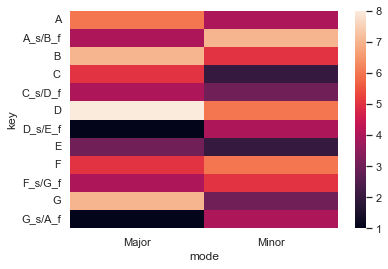

In [40]:
#Visualize relationship of key and mode with heatmap
top_100_tracks_crosstab = pd.crosstab(index=top_100_tracks['key'], columns=top_100_tracks['mode']) # Contingence table comparing key and mode
sns.heatmap(top_100_tracks_crosstab) # Generate heatmap
plt.show()

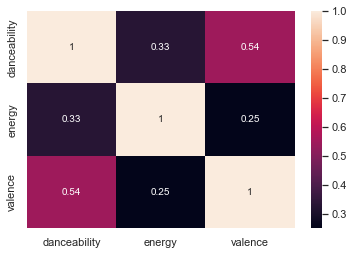

In [41]:
#Visualize relationship of numerical variables
corrleation_100 = top_100_tracks.select_dtypes('number').corr()
sns.heatmap(corrleation_100, annot= True)
plt.show()

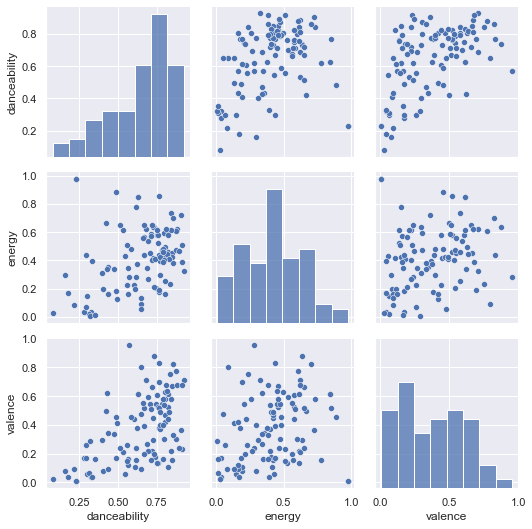

In [42]:
# View scatterplot and histogram of data on the same plot
g_100 = sns.PairGrid(top_100_tracks)
g_100.map_diag(sns.histplot)
g_100.map_offdiag(sns.scatterplot)
plt.show()

In [55]:
print(unique_tracks.select_dtypes('number').mean())
print(top_100_tracks.select_dtypes('number').mean())

danceability    0.663177
energy          0.446036
valence         0.396361
dtype: float64
danceability    0.644541
energy          0.418216
valence         0.377745
dtype: float64


## Streaming by Month

In [43]:
grouped_by_month = df.groupby(df['datetime'].dt.month, sort = False).agg({'secPlayed' : 'sum', 'danceability' : 'mean', 'energy' : 'mean', 'valence' : 'mean'}).reset_index()
grouped_by_month['hoursPlayed'] = grouped_by_month['secPlayed'] / 600

map_dict = {6: "June",  7: "July",  8: 'Aug',  9: 'Sep', 10: 'Oct', 11: 'Nov' , 12: 'Dec',  1: 'Jan',  2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May'}
grouped_by_month['month'] = grouped_by_month['datetime'].map(map_dict)

In [44]:
grouped_by_month

,datetime,secPlayed,danceability,energy,valence,hoursPlayed,month
0,6,166741.185,0.674019,0.452659,0.432763,277.901975,June
1,7,84614.383,0.676407,0.400997,0.401391,141.023972,July
2,8,128669.101,0.605519,0.449200,0.337025,214.448502,Aug
3,9,63218.276,0.692211,0.431080,0.417793,105.363793,Sep
4,10,39929.380,0.655790,0.517469,0.433937,66.548967,Oct
5,11,34988.653,0.660366,0.464500,0.417597,58.314422,Nov
6,12,77342.741,0.621321,0.331704,0.309444,128.904568,Dec
7,1,274298.647,0.677890,0.421590,0.398705,457.164412,Jan
8,2,259356.759,0.672208,0.422448,0.417726,432.261265,Feb
9,3,189002.879,0.660306,0.439876,0.377406,315.004798,Mar


In [45]:
grouped_by_month.drop(0, inplace = True)

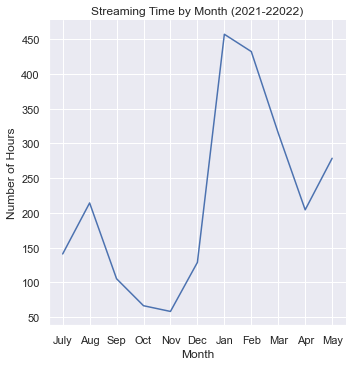

In [46]:
sns.relplot(x = 'month',  y = 'hoursPlayed', data = grouped_by_month, kind = 'line')
plt.title("Streaming Time by Month (2021-22022)")
plt.ylabel('Number of Hours')
plt.xlabel('Month')
plt.show()

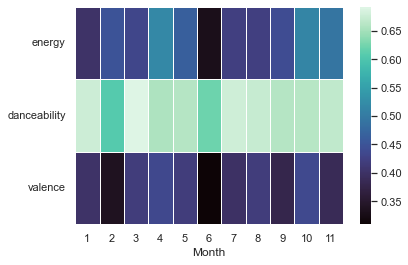

In [47]:
sns.heatmap(grouped_by_month[['energy', 'danceability', 'valence' ]].transpose(), center = 0.5, linewidths= .5, cmap= "mako") 
plt.yticks(rotation = 0)
plt.xlabel('Month')
plt.show()


## Feature Engineering & Machine Learning

[Classify Spotify Songs into Playlists](https://towardsdatascience.com/ml-step-by-step-using-knn-algorithm-to-classify-spotify-songs-into-playlists-8c7892428371)


In [57]:
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import train_test_split

# rng = np.random.RandomState(0)
# model = make_pipeline(StandardScaler(), LinearRegression())




In [48]:
# features = ['danceability', 'energy', 'valence']

# #standardizing features (we're interested not in their absolute value, but in how each changed over time)
# for feature in features:
#     grouped_by_tracks[f'{feature}_zscore'] = ( grouped_by_tracks[feature] - grouped_by_tracks[feature].mean() ) / grouped_by_tracks[feature].std()

# #making sure we standardized correctly: mean is 0 and std is 1
# grouped_by_tracks[[feature + '_zscore' for feature in features]].describe().loc['mean':'std'].T

# features_z = grouped_by_tracks[[feature + '_zscore' for feature in features]].columns

# from sklearn.model_selection import train_test_split
# X = grouped_by_tracks[features_z]
# y = grouped_by_tracks['total_minutesPlayed']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X, y)
# score = reg.score(X, y)
# coef = reg.coef_
# coef_df = pd.DataFrame([["danceability_zscore", "energy_zscore", "valence_zscore"], coef])
# print(coef_df)

In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(unique_tracks[['valence', 'energy']])
unique_tracks['clusters'] = kmeans.labels_

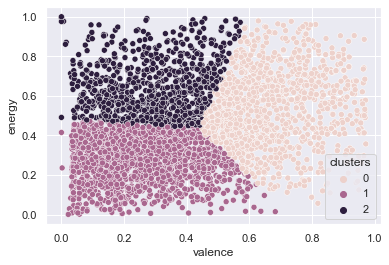

In [88]:
sns.scatterplot(data = unique_tracks, x = 'valence', y = 'energy', hue = 'clusters' )
plt.show()

In [84]:
unique_tracks.groupby('clusters').get_group(1).head()

,artistName,trackName,danceability,energy,key,mode,valence,albumName,clusters
60,Wale,Good Vibes (Za),0.734,0.635,A_s/B_f,Minor,0.878,Good Vibes (Za),1
140,Wun Two,la donna e la chitarra,0.569,0.283,D_s/E_f,Major,0.957,la donna e la chitarra,1
226,Freckle & Pete,BeatStop,0.744,0.205,B,Major,0.545,BeatStop,1
240,Loaderror,One Hundred Masters,0.427,0.338,G,Minor,0.619,Broken Umbrella,1
249,Screen Jazzmaster,Warm Breeze,0.729,0.420,F_s/G_f,Major,0.449,Warm Breeze,1


In [85]:
unique_tracks.groupby('clusters').get_group(2).head()

,artistName,trackName,danceability,energy,key,mode,valence,albumName,clusters
6,Naga,Rain,0.231,0.976,A_s/B_f,Minor,0.00672,grey cloud,2
120,Lovetime Rhapsody,Try Again,0.435,0.352,D,Minor,0.34500,Try Again - SM STATION,2
130,spice rack,Ginger and Lime,0.728,0.636,G,Major,0.29700,the spice is right,2
175,spice rack,Nutmeg,0.472,0.338,C,Major,0.33300,flavors,2
245,Bishop Beckett,Postcards,0.772,0.399,A,Major,0.37000,Postcards,2


In [86]:
unique_tracks.groupby('clusters').get_group(0).head()

,artistName,trackName,danceability,energy,key,mode,valence,albumName,clusters
148,Ninjasister,Rain On Me,0.620,0.281,B,Major,0.2380,Rain On Me,0
149,"Frankly, We Hold",United We Belong,0.769,0.179,F_s/G_f,Minor,0.3790,Open Skies,0
584,Gold School,The Neighborhood,0.605,0.223,D_s/E_f,Minor,0.4390,Playground,0
1309,Idyllik Beat,Purple & Yellow,0.493,0.130,F,Minor,0.4150,Purple & Yellow,0
1641,Jon Hopkins,Candles,0.298,0.148,D_s/E_f,Minor,0.0603,Monsters (Original Motion Picture Soundtrack),0
